In [1]:
import xarray as xr 



In [2]:
ds = xr.open_dataset("./ModelOutput/2-phase/predictions/ens/Emiliania_huxleyi.nc")


print(ds)

<xarray.Dataset>
Dimensions:  (lat: 60, lon: 60, depth: 60, time: 12)
Coordinates:
  * lat      (lat) float64 -85.88 -82.58 -81.49 -78.18 ... 69.84 81.46 83.19
  * lon      (lon) float64 -176.3 -175.1 -167.1 -153.8 ... 160.3 163.0 176.5
  * depth    (depth) float64 0.4802 1.958 3.485 4.334 ... 197.2 197.7 198.5
  * time     (time) int64 1 2 3 4 5 6 7 8 9 10 11 12
Data variables:
    mean     (lat, lon, depth, time) float64 ...
    sd       (lat, lon, depth, time) float64 ...
    median   (lat, lon, depth, time) float64 ...
    ci95_LL  (lat, lon, depth, time) float64 ...
    ci95_UL  (lat, lon, depth, time) float64 ...
    target   object ...


In [3]:
ds_1 = xr.open_dataset("./ModelOutput/2-phase/predictions/ens/Emiliania_huxleyi.nc")

ds_1['target'] = 'Coccolithus pelagicus'
ds_1.to_netcdf("./ModelOutput/2-phase/predictions/ens/Coccolithus pelagicus.nc")

In [4]:
import xarray as xr
import os

def merge_netcdf(path_in, statistic):
    print("merging...")
    print(path_in)
    
    datasets = []
    
    for file in os.listdir(path_in):
        if file.endswith(".nc"):
            ds = xr.open_dataset(os.path.join(path_in, file))
            if statistic in ds:
                ds_subset = ds[[statistic, "target"]]
                datasets.append(ds_subset)
            else:
                print(f"Statistic '{statistic}' not found in {file}")

    # Merge datasets by variables, keeping same coordinates
    merged_ds = xr.merge(datasets, compat='override')  # 'override' skips conflicts

    print("finished merging NetCDF files")
    return merged_ds

# Run it
merged_ds = merge_netcdf("./ModelOutput/2-phase/predictions/ens/", "mean")


merging...
./ModelOutput/2-phase/predictions/ens/
Loaded: Emiliania_huxleyi.nc
Loaded: Coccolithus pelagicus.nc
finished merging NetCDF files


Emiliania huxleyi
target                                  Emiliania huxleyi
lat        lon         time depth                        
-85.883775 -176.278648 1    0.480177                  NaN
                            1.957816                  NaN
                            3.484901                  NaN
                            4.333694                  NaN
                            6.247024                  NaN
...                                                   ...
 83.189635  176.474491 12   187.126911                NaN
                            192.738664                NaN
                            197.203432                NaN
                            197.652942                NaN
                            198.460525                NaN

[2592000 rows x 1 columns]


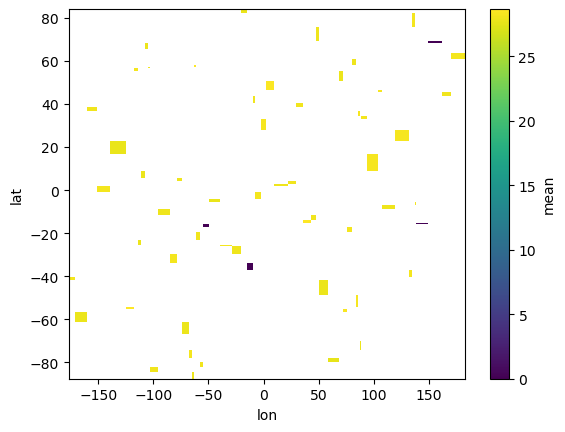

In [5]:
print(ds['target'].values)
ds['mean'].mean(dim=["depth", "time"]).plot()


d = ds.to_dataframe()
d = d.reset_index()
d = d.pivot(index=['lat', 'lon', 'time', 'depth'], columns='target', values='mean')

print(d)


In [6]:
ds = xr.open_dataset("./ModelOutput/2-phase/predictions/ens/50/Emiliania_huxleyi.nc")

ds['Emiliania huxleyi'].mean(dim=["depth", "time"]).plot()


FileNotFoundError: [Errno 2] No such file or directory: '/home/phyto-2/Abil/tests/ModelOutput/2-phase/predictions/ens/50/Emiliania_huxleyi.nc'

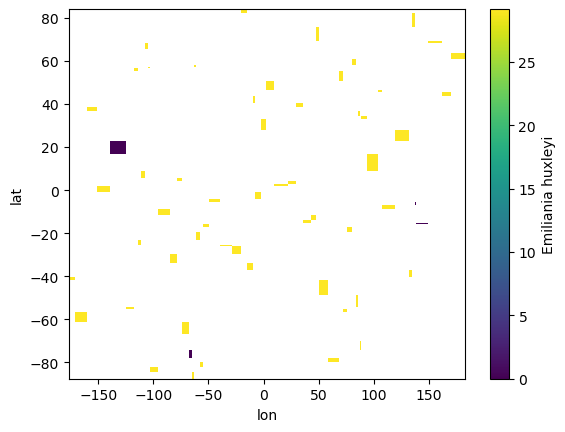

In [ ]:
ds = xr.open_dataset("./ModelOutput/2-phase/predictions/rf/50/Emiliania_huxleyi.nc")

ds['Emiliania huxleyi'].mean(dim=["depth", "time"]).plot()
